## Exploratory Analysis with Linear Regressions
_______________________________________________________________________________________
### Data Set Name : Students Score Dataset and Student Graduation Rate - Linear Regression
### Author: Niveen Alsmadi
### Date: 22-June-2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load the data you receive into a Pandas DataFrame.

In [2]:
DataFrame = pd.read_csv('student_scores.csv')
DataFrame1 = pd.read_csv('graduation_rate.csv')

### Show the first five rows of the data set.

In [3]:
DataFrame.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
DataFrame1.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4


### Show the description and the info of the data set.

In [5]:
DataFrame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
DataFrame1.describe()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,28.557000,1997.803000,66564.905000,3.712900,3.36990,4.992000
std,2.776051,142.736442,19451.865744,0.283415,0.23622,1.403533
min,19.000000,1498.000000,1882.000000,2.700000,2.70000,3.000000
25%,27.000000,1907.750000,53443.000000,3.500000,3.20000,4.000000
50%,29.000000,1999.000000,65441.000000,3.800000,3.40000,5.000000
75%,30.000000,2092.250000,79845.250000,4.000000,3.50000,6.000000
max,36.000000,2397.000000,120391.000000,4.000000,4.00000,10.000000


In [7]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
DataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


### Using a regression model, split your data into train and test data.

In [9]:
hours = DataFrame['Hours'].values
hours

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [10]:
scores = DataFrame['Scores'].values
scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [11]:
hours= hours.reshape(-1,1)
hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
hour_train, hour_test, score_train, score_test =train_test_split(hours, scores, train_size=0.8, test_size=0.2, random_state=40)


### Fit your training split to the regression model.

In [13]:
model = LinearRegression()
model.fit(hour_train, score_train)

LinearRegression()

In [14]:
y_predict = model.predict(hour_test)
y_predict

array([88.44663283, 77.73202788, 12.47034316, 73.83580789, 33.89955306])

In [15]:
score_test

array([95, 86, 17, 69, 42])

In [16]:
print(f'Testing Accuracy: {model.score(hour_test, score_test)*100}%')
print(f'Training Accuracy: {model.score(hour_train, score_train)*100}%')

Testing Accuracy: 94.66449081971943%
Training Accuracy: 95.04931730009658%


### Show your regression model’s score.

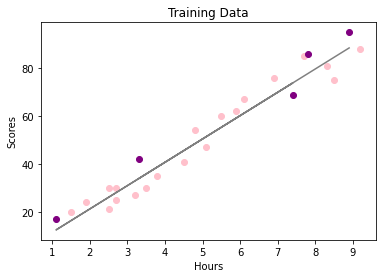

In [17]:
%matplotlib inline
plt.scatter(hour_train, score_train, color='pink')
plt.scatter(hour_test, score_test, color='purple')
plt.plot(hour_test, y_predict, color='gray')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Data')
plt.show()

#### Draw at least three conclusions from your regression model.

In [18]:
data=DataFrame1[["ACT composite score","years to graduate","college gpa","high school gpa","parental income","SAT total score"]]
data

,ACT composite score,years to graduate,college gpa,high school gpa,parental income,SAT total score
0,30,3,3.8,4.0,94873,2206
1,26,9,2.7,3.6,42767,1953
2,28,5,3.3,4.0,46316,2115
3,33,4,3.5,4.0,52370,2110
4,30,4,3.6,4.0,92665,2168
...,...,...,...,...,...,...
995,30,6,3.5,3.8,49002,1967
996,28,4,3.5,3.9,83438,2066
997,27,5,3.7,3.6,68577,1971
998,30,3,3.6,3.8,56876,2057


#### conclusion 1 : we can see that student with high gpa in high schoool have the same or higher gpa in college

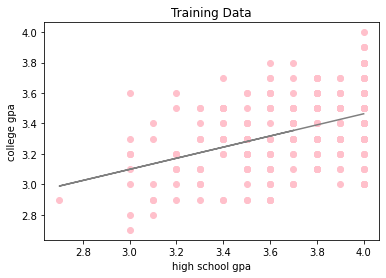

In [19]:
x = DataFrame1['high school gpa'].values.reshape(-1,1)

y = DataFrame1['college gpa'].values

x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.3, test_size=0.7 ,random_state=40)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
plt.scatter(x_train, y_train, color='pink')
plt.plot(x_test, y_predict, color='gray')
plt.xlabel('high school gpa')
plt.ylabel('college gpa')
plt.title('Training Data')
plt.show()

#### conclusion 2 : we can also see parents of student who have a high income reflected positively in student gpa

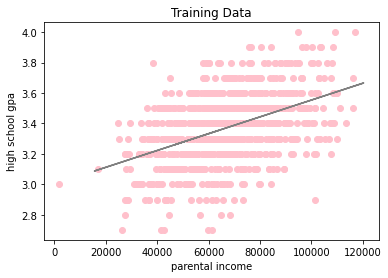

In [20]:
x = DataFrame1['parental income'].values.reshape(-1,1)

y = DataFrame1['college gpa'].values

x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.8, test_size=0.2,random_state=13)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
plt.scatter(x_train, y_train, color='pink')
plt.plot(x_test, y_predict, color='gray')
plt.xlabel('parental income')
plt.ylabel('high school gpa')
plt.title('Training Data')
plt.show()

#### conclusion 3 : we can see when ACT score increse the SAT increase

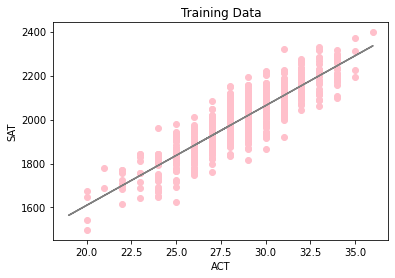

In [21]:
x = DataFrame1['ACT composite score'].values.reshape(-1,1)

y = DataFrame1['SAT total score'].values

x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.7, test_size=0.3,random_state=50)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
plt.scatter(x_train, y_train, color='pink')
plt.plot(x_test, y_predict, color='gray')
plt.xlabel('ACT')
plt.ylabel('SAT')
plt.title('Training Data')
plt.show()